# Priprema

```
pip install pandas==0.24.2
pip install statsmodels==0.10.2
pip install tensorflow==2.0.0
pip install fbprophet==0.5
```

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
%matplotlib inline

plt.rcParams["font.size"] = 12.0
plt.rcParams["date.autoformatter.year"] = "%Y"
plt.rcParams["date.autoformatter.month"] = "%m.%Y"
plt.rcParams["date.autoformatter.day"] = "%d.%m.%Y"
plt.rcParams["date.autoformatter.hour"] = "%d.%m %H"
plt.rcParams["date.autoformatter.minute"] = "%d %H:%M"
plt.rcParams["date.autoformatter.second"] = "%H:%M:%S"
plt.rcParams["date.autoformatter.microsecond"] = "%M:%S.%f"

# Vremenski niz

Primjer:

```json
{ 
    "01.01.2019.": 1,
    "01.02.2019.": 2,
    "01.03.2019.": 2,
    "01.04.2019.": 3,
    "01.05.2019.": 2,
}
```


In [2]:
mini_ts = { 
    "01.01.2019.": 1,
    "02.01.2019.": 2,
    "03.01.2019.": 2,
    "04.01.2019.": 3,
    "05.01.2019.": 2,
}

mini_ts = pd.DataFrame.from_dict(mini_ts, orient="index", columns=["y"])

In [3]:
mini_ts

,y
01.01.2019.,1
02.01.2019.,2
03.01.2019.,2
04.01.2019.,3
05.01.2019.,2


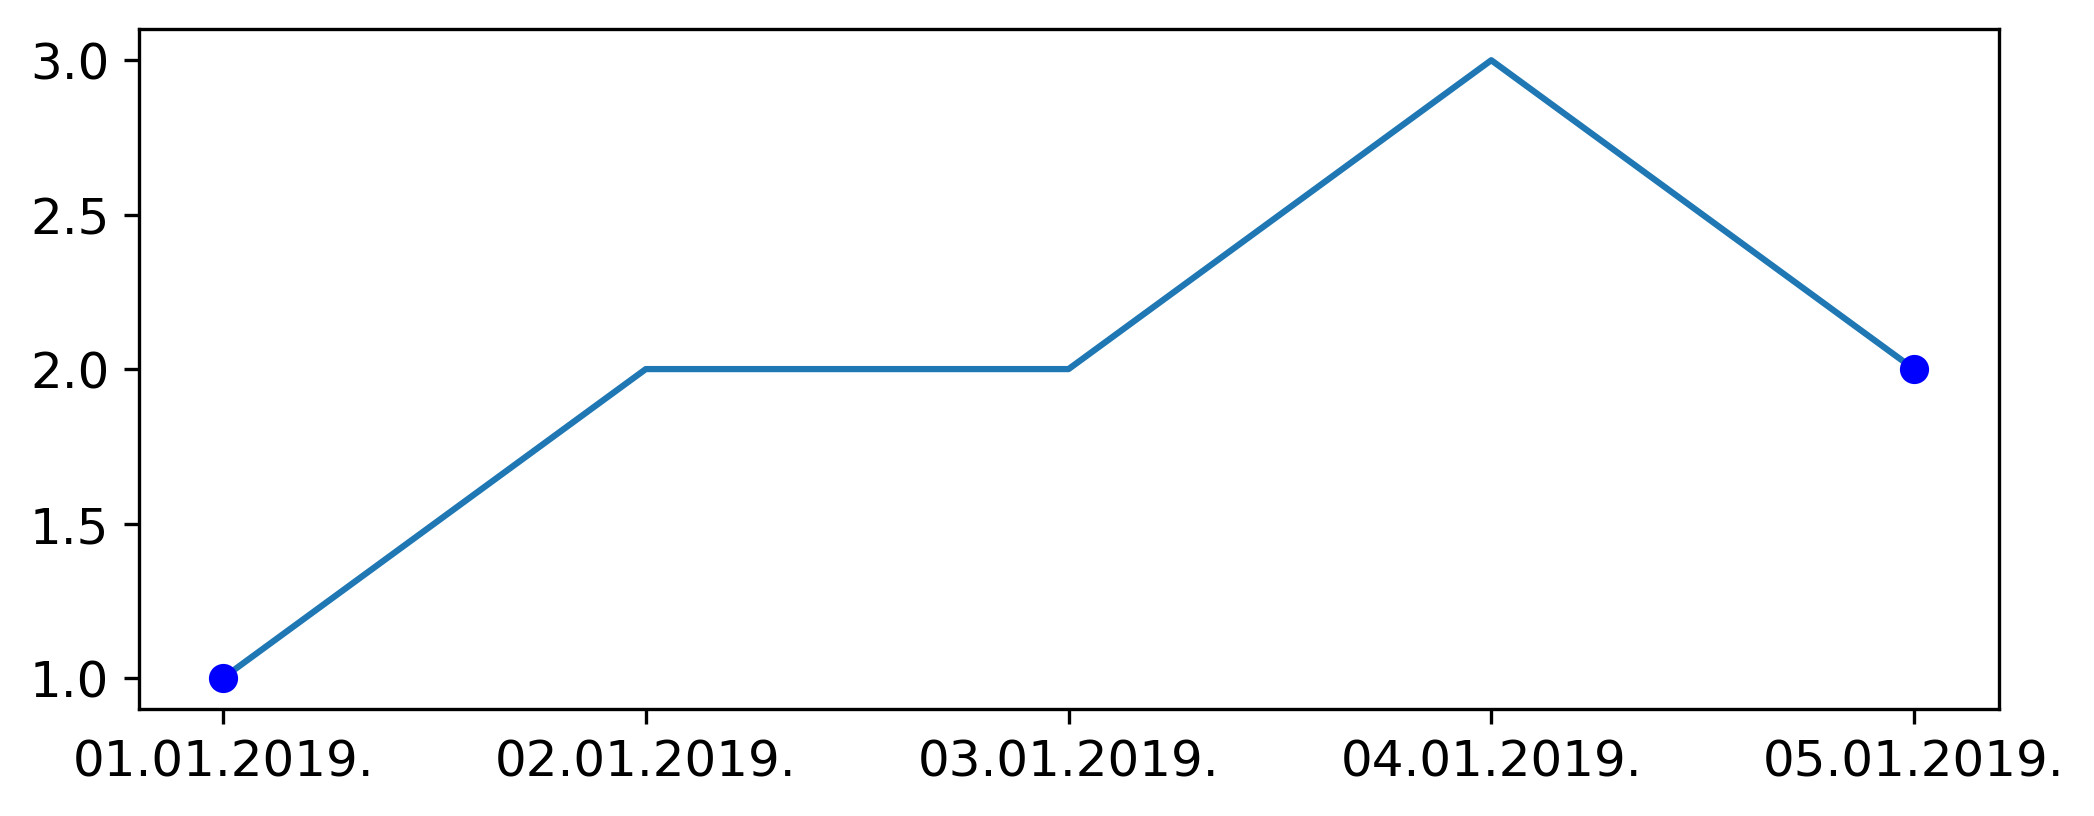

In [4]:
plt.figure(figsize=(8, 3), dpi=300)
plt.plot(mini_ts)
plt.plot(mini_ts.index[0], mini_ts.y.iloc[0], "bo", color="blue")
plt.plot(mini_ts.index[-1], mini_ts.y.iloc[-1], "bo", color="blue")
plt.savefig("img/zero_step.svg", dpi=300)

### One-step prediction

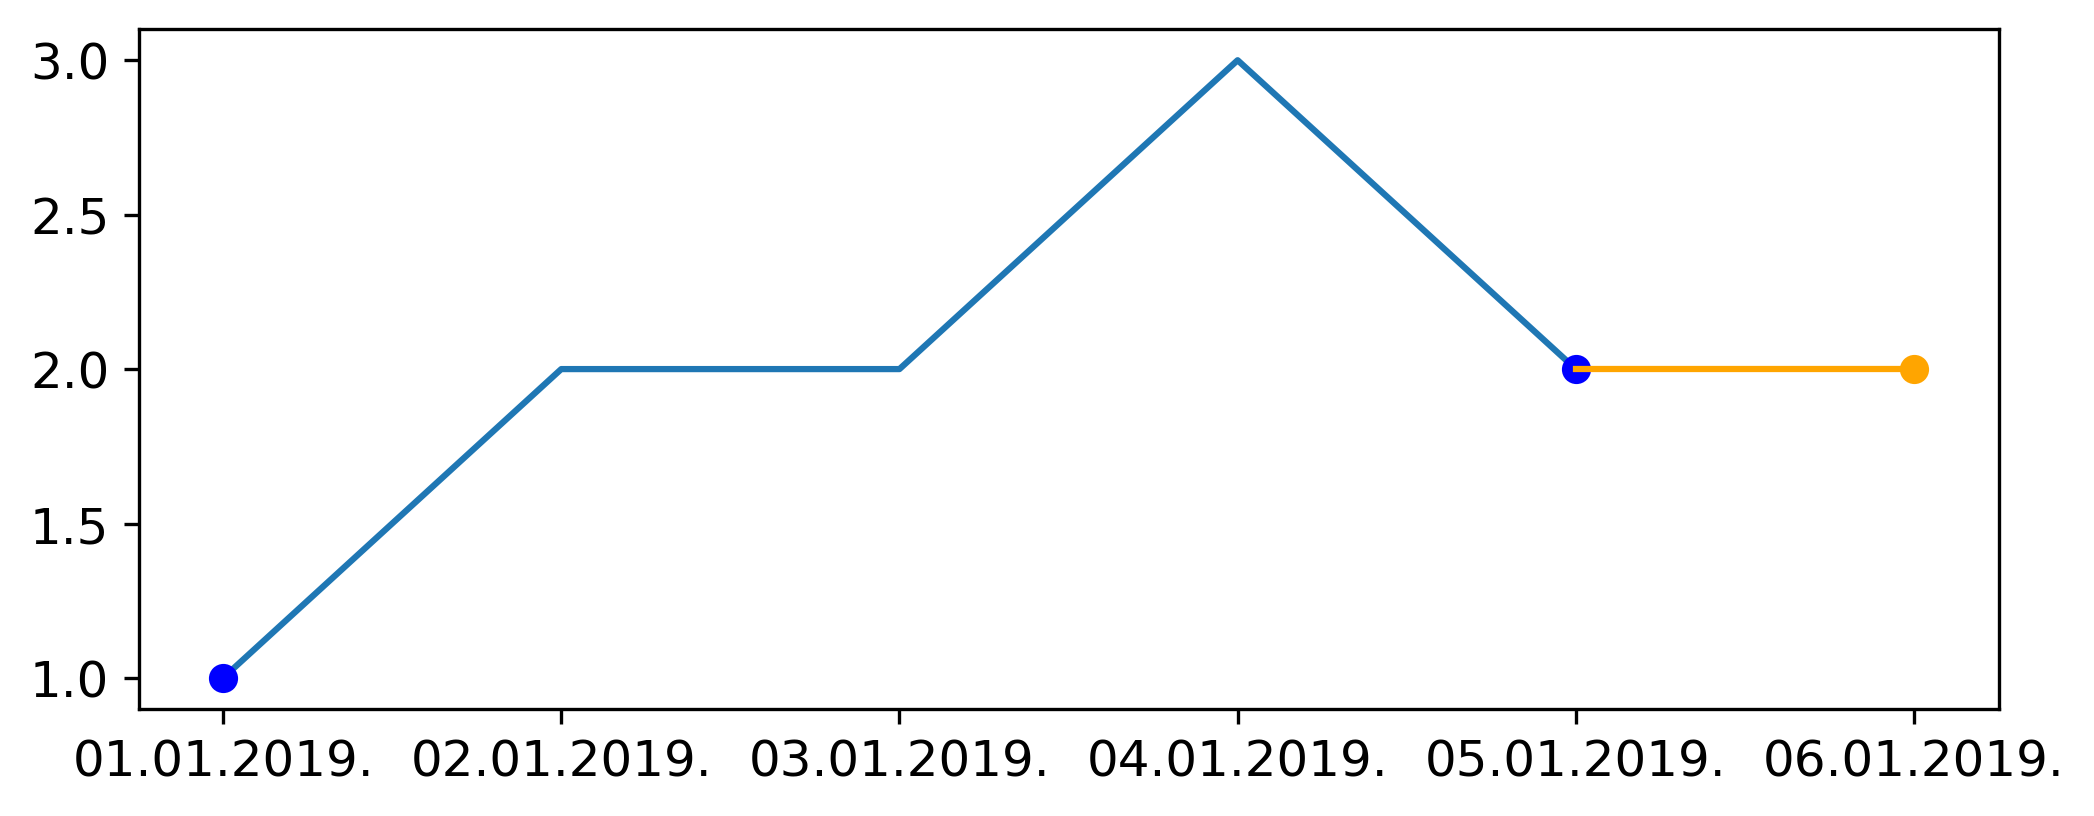

In [5]:
plt.figure(figsize=(8, 3), dpi=300)
plt.plot(mini_ts)
plt.plot("06.01.2019.", 2, "bo", color="orange")
plt.plot(mini_ts.index[0], mini_ts.y.iloc[0], "bo", color="blue")
plt.plot(mini_ts.index[-1], mini_ts.y.iloc[-1], "bo", color="blue")
plt.plot(["05.01.2019.", "06.01.2019."], [2, 2], color="orange")
plt.savefig("img/one_step.svg", dpi=300)

### Multi-step prediction

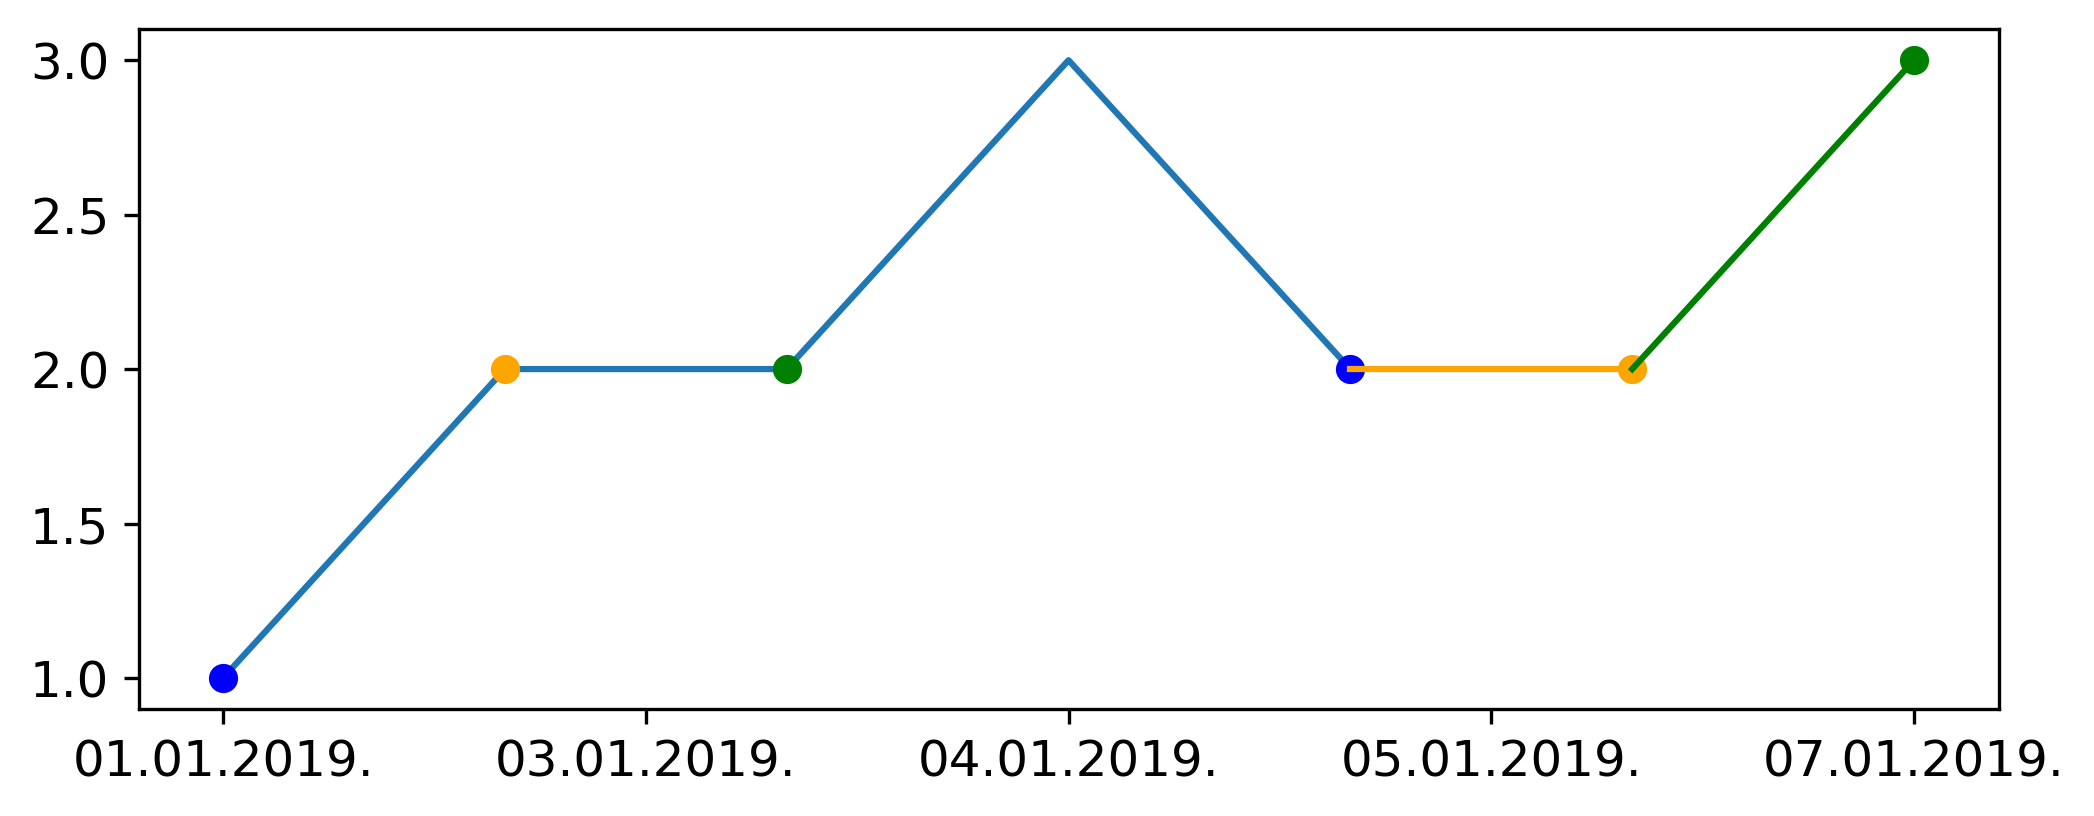

In [14]:
plt.figure(figsize=(8, 3), dpi=300)
plt.plot(mini_ts)
plt.plot(mini_ts.index[0], mini_ts.y.iloc[0], "bo", color="blue")
plt.plot(mini_ts.index[-1], mini_ts.y.iloc[-1], "bo", color="blue")

plt.plot(mini_ts.index[1], mini_ts.y.iloc[1], "bo", color="orange")
plt.plot("06.01.2019.", 2, "bo", color="orange")

plt.plot(["05.01.2019.", "06.01.2019."], [2, 2], color="orange")

plt.plot("07.01.2019.", 3, "bo", color="green")
plt.plot(mini_ts.index[2], mini_ts.y.iloc[2], "bo", color="green")
plt.plot(["06.01.2019.", "07.01.2019."], [2, 3], color="green")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.savefig("img/multi_step.svg", dpi=300)

# Rezervacije

In [7]:
ts = pd.read_csv("data/reservations_01_07.csv", index_col=[0])

In [8]:
ts.head()

,y
X,
2015-07-01,10
2015-07-02,13
2015-07-03,7
2015-07-04,8
2015-07-05,2


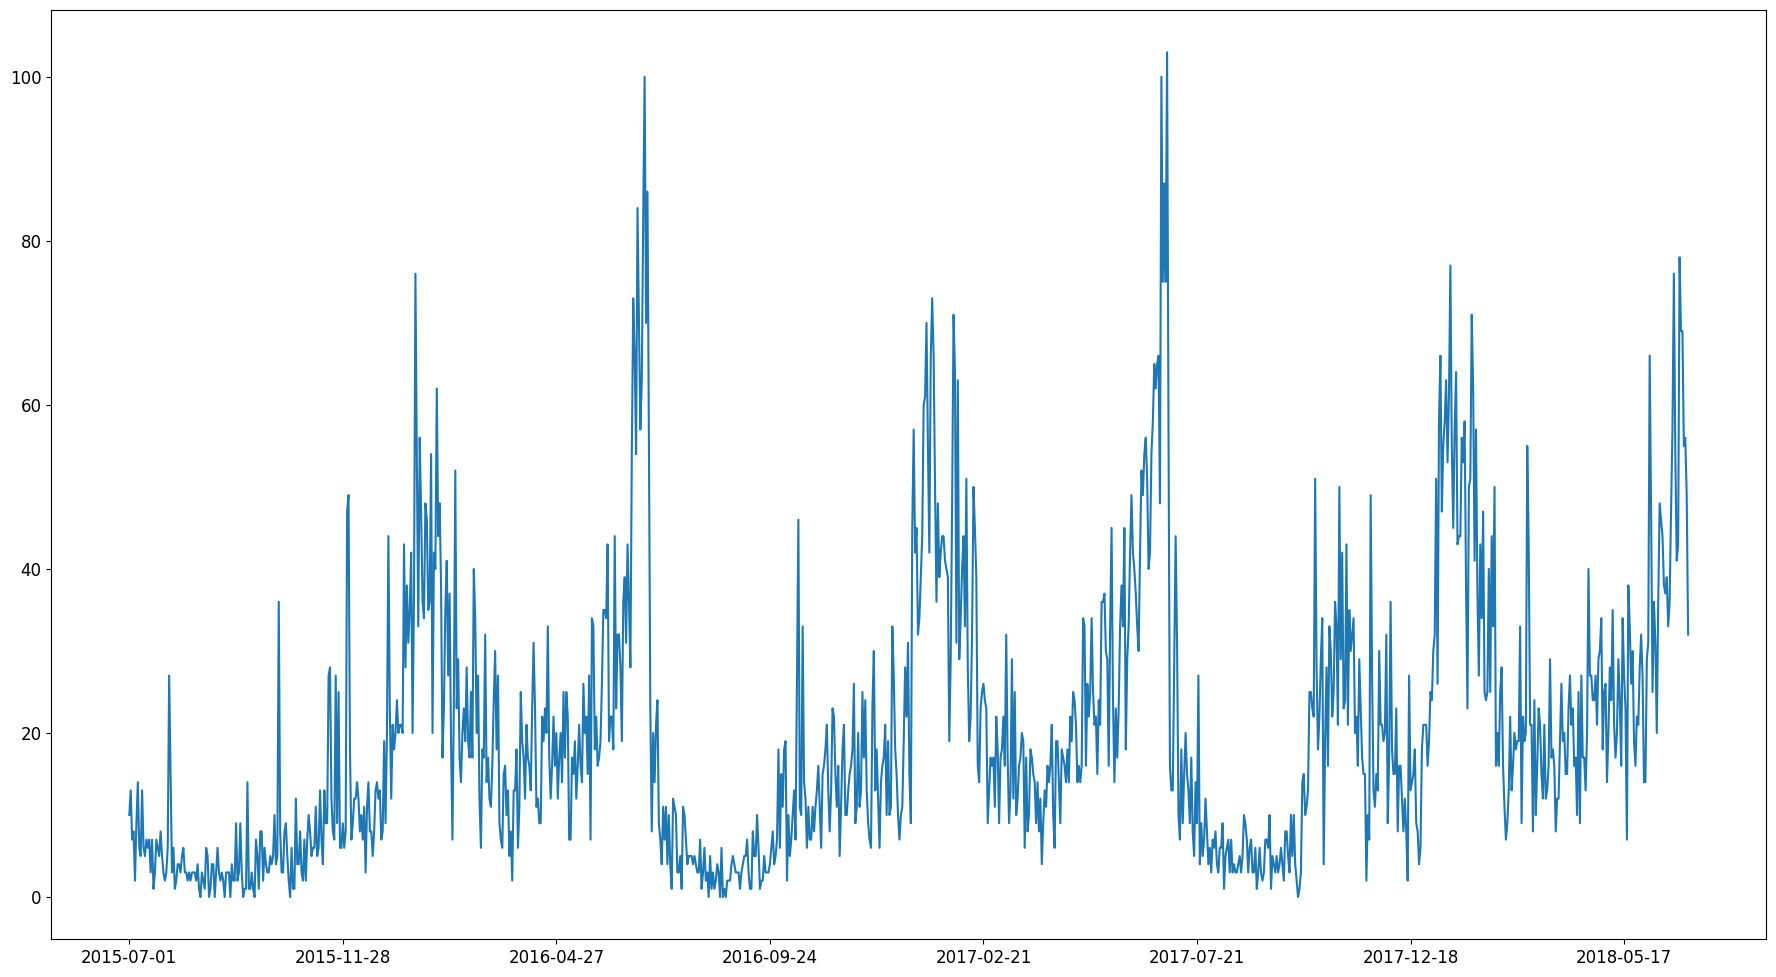

In [13]:
plt.figure(figsize=(18, 10), dpi=100)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.plot(ts)

In [10]:
train = ts.iloc[:-60]
test = ts.iloc[-60:]

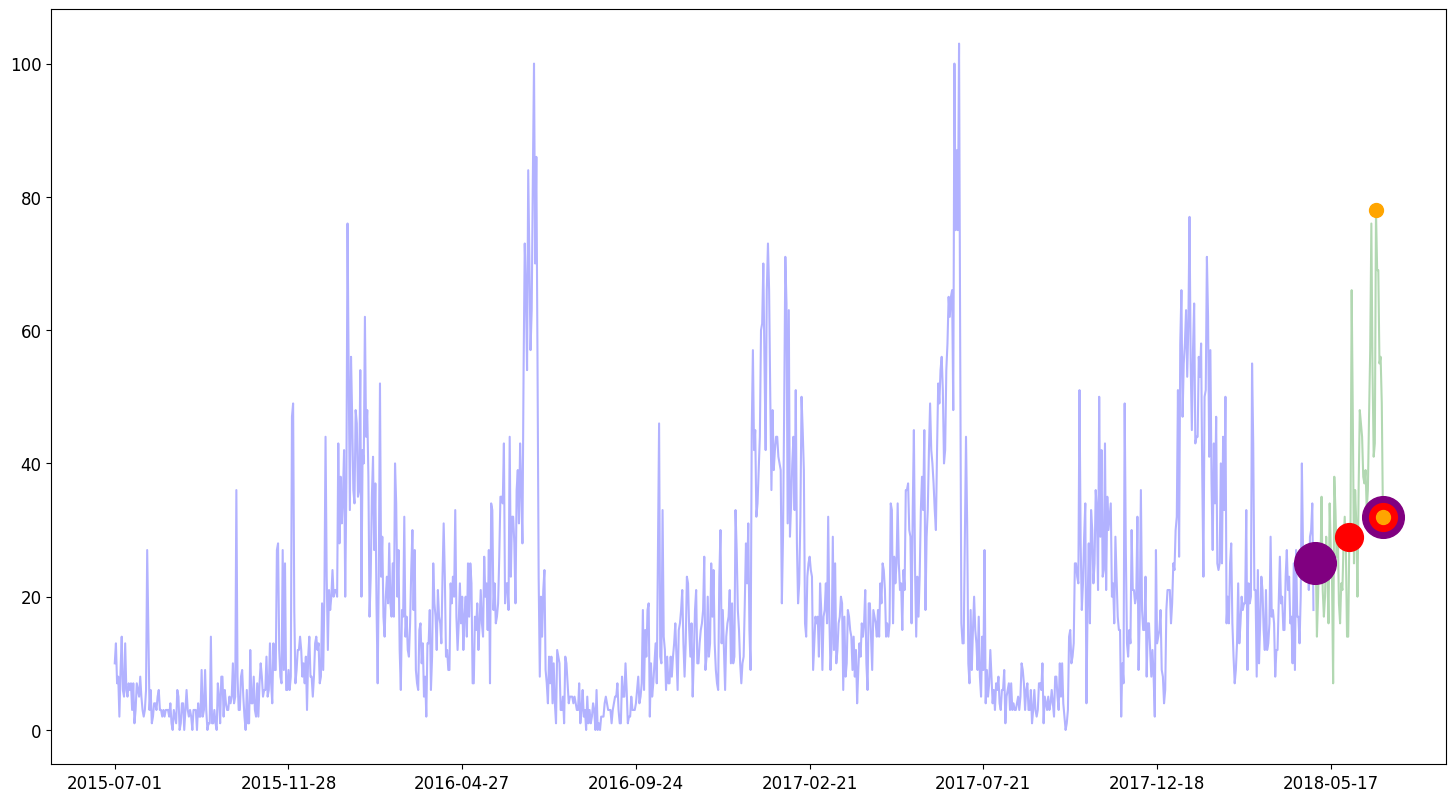

In [11]:
plt.figure(figsize=(18, 10), dpi=100)
plt.tight_layout()
plt.plot(train, color="blue", alpha=0.3)
plt.plot(test, color="green", alpha=0.3)

plt.plot(test.iloc[[0, 59], ], "bo", color="purple", markersize=30)
plt.plot(test.iloc[-30:].iloc[[0, 29], ], "bo", color="red", markersize=20)
plt.plot(test.iloc[-7:].iloc[[0, 6], ], "bo", color="orange", markersize=10)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.savefig("img/ts_prediction_points.svg", dpi=300)

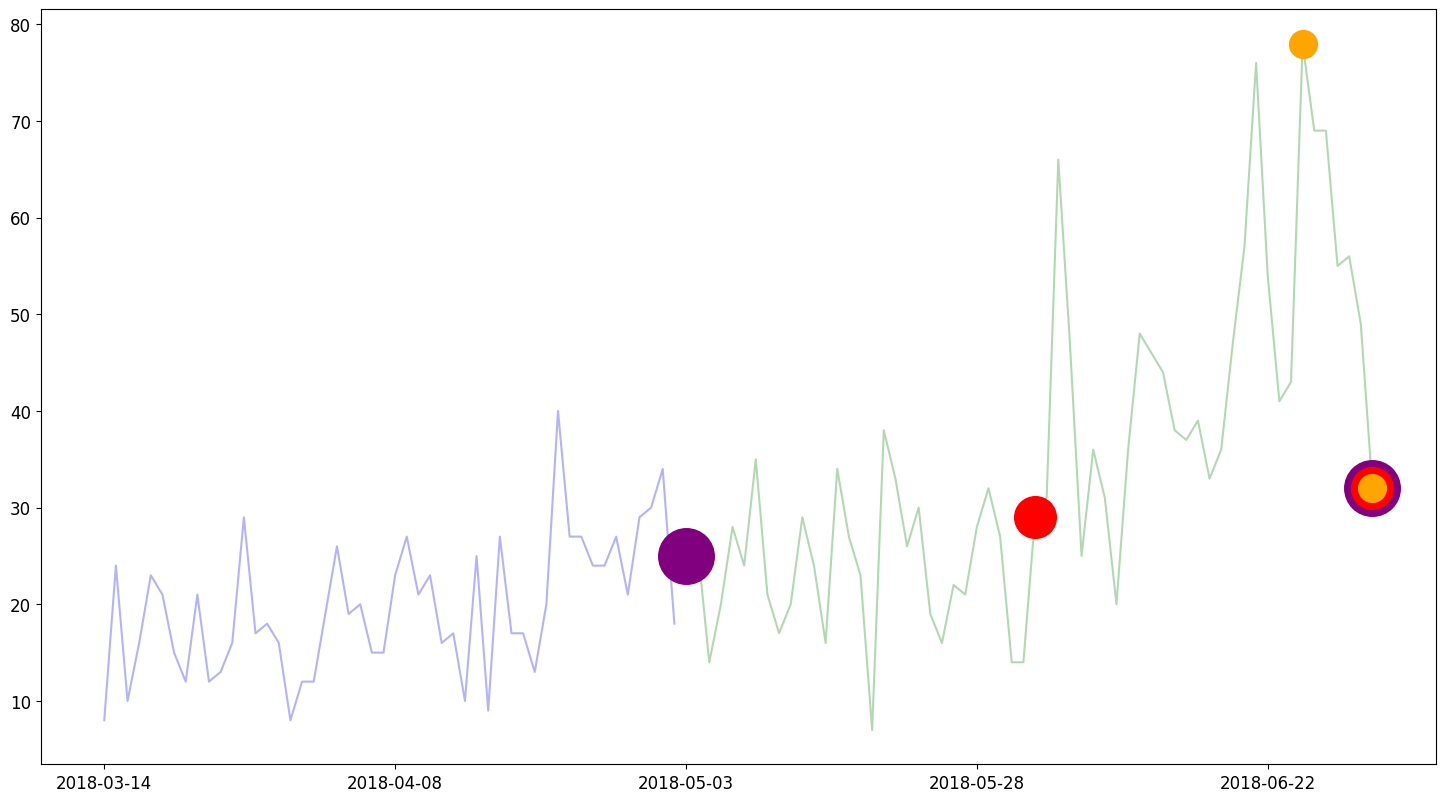

In [15]:
plt.figure(figsize=(18, 10), dpi=100)
plt.tight_layout()
plt.plot(train.iloc[-50:], color="blue", alpha=0.3)
plt.plot(test, color="green", alpha=0.3)

plt.plot(test.iloc[[0, 59], ], "bo", color="purple", markersize=40)
plt.plot(test.iloc[-30:].iloc[[0, 29], ], "bo", color="red", markersize=30)
plt.plot(test.iloc[-7:].iloc[[0, 6], ], "bo", color="orange", markersize=20)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.savefig("img/ts_prediction_points_zoomed.svg", dpi=300)